In [2]:
import yfinance as yf
#this calls the yahoo finance api to download daily stock and index prices

In [3]:
sp500_ticker = yf.Ticker("^GSPC")
#ticker class enables us to download proce history for a single symbol
#(in this case we'll use GSPC, which is sp500 index)

In [4]:
sp500_history = sp500_ticker.history(period="max")
#this will query all data from very beginning from when the index was created

In [5]:
sp500_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-24 00:00:00-05:00,5984.629883,6040.100098,5981.439941,6040.040039,1757720000,0.0,0.0
2024-12-26 00:00:00-05:00,6024.970215,6049.750000,6007.370117,6037.589844,2904530000,0.0,0.0
2024-12-27 00:00:00-05:00,6006.169922,6006.169922,5932.950195,5970.839844,3159610000,0.0,0.0


In [6]:
sp500_history.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-12-17 00:00:00-05:00', '2024-12-18 00:00:00-05:00',
               '2024-12-19 00:00:00-05:00', '2024-12-20 00:00:00-05:00',
               '2024-12-23 00:00:00-05:00', '2024-12-24 00:00:00-05:00',
               '2024-12-26 00:00:00-05:00', '2024-12-27 00:00:00-05:00',
               '2024-12-30 00:00:00-05:00', '2024-12-31 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24367, freq=None)

##Cleaning & Visualising stock data

<Axes: xlabel='Date'>

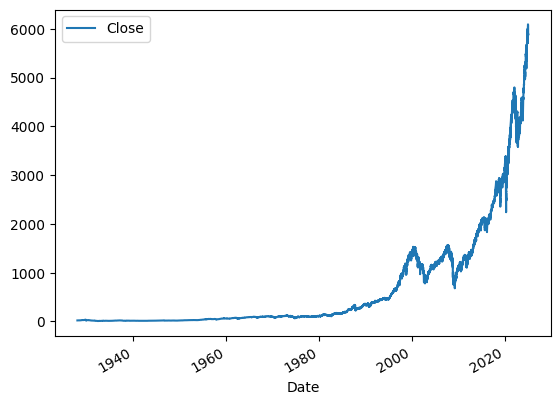

In [7]:
sp500_history.plot.line(y="Close",use_index = True)

In [8]:
#deleting unecessary columns
del sp500_history["Dividends"]
del sp500_history["Stock Splits"]

In [9]:
sp500_history.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In [10]:
#setting up our target
#our target is we will be predicting whether the stock will go up or down
sp500_history["Tomorrow"] = sp500_history["Close"].shift(-1)
#this col tomorrow is closing price of stock tomorrow
sp500_history.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000


In [11]:
sp500_history["Target"] = (sp500_history["Tomorrow"] > sp500_history["Close"]).astype(int)
#this will return a boolean, True if tomorrow's price is > Today's price
#but we will convert that into int
sp500_history.head()


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0


In [12]:
sp500_history=sp500_history.loc["1990-01-01":].copy()
#we'll consider only data after 1990 Jan1

##Training our Model

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500_history.iloc[:-100]
test = sp500_history.iloc[-100:]

#all cols used for predicting
predictors = ["Close" , "Volume", "Open" , "High" , "Low"]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [16]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])


In [17]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [18]:
preds

,0
Date,
2024-08-09 00:00:00-04:00,1
2024-08-12 00:00:00-04:00,1
2024-08-13 00:00:00-04:00,1
2024-08-14 00:00:00-04:00,1
2024-08-15 00:00:00-04:00,1
...,...
2024-12-24 00:00:00-05:00,1
2024-12-26 00:00:00-05:00,1
2024-12-27 00:00:00-05:00,0


In [19]:
precision_score(test["Target"], preds)

0.6896551724137931

<Axes: xlabel='Date'>

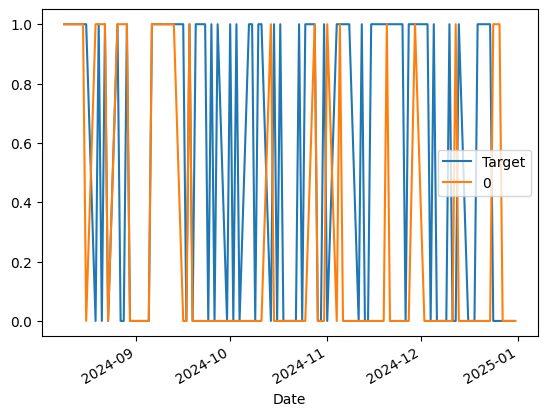

In [20]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

##Building a backtesting system

In [21]:
def predict(train , test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined


In [22]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    tarin = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)

  return pd.concat(all_predictions)


In [24]:
predictions = backtest(sp500_history, model, predictors)

In [26]:
#this gives how many days market goes up and how many days market would go down
predictions["Predictions"].value_counts()

,count
Predictions,
1,4132
0,2185


In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.718296224588577

In [30]:
predictions["Target"].value_counts() / predictions.shape[0]
#we can also loook at % of days when the actually went up and went down

,count
Target,
1,0.535856
0,0.464144


## Adding few more predictors to improve accuracy

In [31]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500_history.rolling(horizon).mean()
  ratio_column = f"Close_Ratio_{horizon}"
  sp500_history[ratio_column] = sp500_history["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500_history[trend_column] = sp500_history.shift(1).rolling(horizon).sum()["Target"]
  new_predictors += [ratio_column, trend_column]

In [32]:
sp500_history

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24 00:00:00-05:00,5984.629883,6040.100098,5981.439941,6040.040039,1757720000,6037.589844,0,1.005491,2.0,1.017383,3.0,1.023002,35.0,1.115492,144.0,1.337188,531.0
2024-12-26 00:00:00-05:00,6024.970215,6049.750000,6007.370117,6037.589844,2904530000,5970.839844,0,0.999797,1.0,1.011334,3.0,1.021639,35.0,1.114008,143.0,1.335962,530.0
2024-12-27 00:00:00-05:00,6006.169922,6006.169922,5932.950195,5970.839844,3159610000,5906.939941,0,0.994441,0.0,0.996689,3.0,1.009600,34.0,1.100716,143.0,1.320543,529.0


In [33]:
sp500_history = sp500_history.dropna()

In [34]:
sp500_history

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,5940.250000,5978.250000,5902.569824,5974.069824,3593280000,6040.040039,1,1.003630,2.0,1.005913,2.0,1.012622,35.0,1.104335,144.0,1.323269,530.0
2024-12-24 00:00:00-05:00,5984.629883,6040.100098,5981.439941,6040.040039,1757720000,6037.589844,0,1.005491,2.0,1.017383,3.0,1.023002,35.0,1.115492,144.0,1.337188,531.0
2024-12-26 00:00:00-05:00,6024.970215,6049.750000,6007.370117,6037.589844,2904530000,5970.839844,0,0.999797,1.0,1.011334,3.0,1.021639,35.0,1.114008,143.0,1.335962,530.0


##Improving our model

In [35]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [36]:
def predict(train , test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])  [:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  #this is gonna return the probability of the stock proice gonna go up or down tomorrow
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [38]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()

    # Calculate rolling averages and create new predictors for train and test
    horizons = [2,5,60,250,1000]
    for horizon in horizons:
      rolling_averages_train = train.rolling(horizon).mean()
      ratio_column_train = f"Close_Ratio_{horizon}"
      train[ratio_column_train] = train["Close"] / rolling_averages_train["Close"]

      trend_column_train = f"Trend_{horizon}"
      train[trend_column_train] = train.shift(1).rolling(horizon).sum()["Target"]

      rolling_averages_test = test.rolling(horizon).mean()
      ratio_column_test = f"Close_Ratio_{horizon}"
      test[ratio_column_test] = test["Close"] / rolling_averages_test["Close"]

      trend_column_test = f"Trend_{horizon}"
      test[trend_column_test] = test.shift(1).rolling(horizon).sum()["Target"]

    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)

  return pd.concat(all_predictions)

In [39]:
predictions = backtest(sp500_history, model, new_predictors)

In [40]:
predictions["Predictions"].value_counts()
#the change in value counts is due to change in threshold to 0.6 which makes model more accurate

,count
Predictions,
0.0,4764
1.0,552


In [42]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5489130434782609